# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


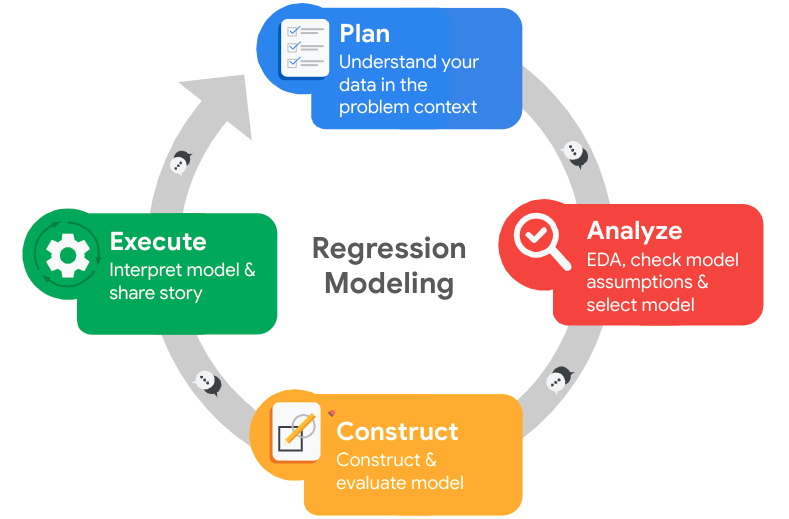

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df = df0.rename(columns={'average_montly_hours':'average_monthly_hours', 
                    'Work_accident':'work_accident', 
                    'Department':'department',
                    'salary':'salary'})

# Display all column names after the update
### YOUR CODE HERE ###
df.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df[df.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  work_accident  left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                     127                   3              0     1   
1368                     132                   3              0     1   
1461                     142                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_nodups = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df_nodups[df_nodups.duplicated()])
df_nodups.head(5)

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, work_accident, left, promotion_last_5years, department, salary]
Index: []


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Check outliers

Check for outliers in the data.

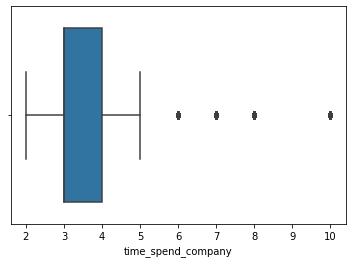

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df_nodups['time_spend_company'])


In [11]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
print(len(df_nodups[df_nodups['time_spend_company'] > 5]) / len(df_nodups) *100)
df_nodups[df_nodups['time_spend_company'] > 5]

6.8718205320657155


satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_monthly_hours  time_spend_company  work_accident  left  \
1                        262                   6              0     1   
17                       255                   6              0     1   
34                       246                   6              0     1   
47                       273                   6              0     1   
67                       264                   6              0     1   
...                      ...                 ...            ...   ...   
11994                    193                  10              0     0   
11995                    259                  10              1     0   
11996                    266                  10              0     0   
11997                    185                  10              0     0   
11998                    172                  10              0     0   

       promotion_last_5years   department  salary  
1                          0        sales  medium  
17                         0        sales     low  
34                         0           hr     low  
47                         0      support     low  
67                         0  product_mng  medium  
...                      ...          ...     ...  
11994                      1   management    high  
11995                      1   management    high  
11996                      1   management    high  
11997                      1   management    high  
11998                      1    marketing    high  

[824 rows x 10 columns]

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



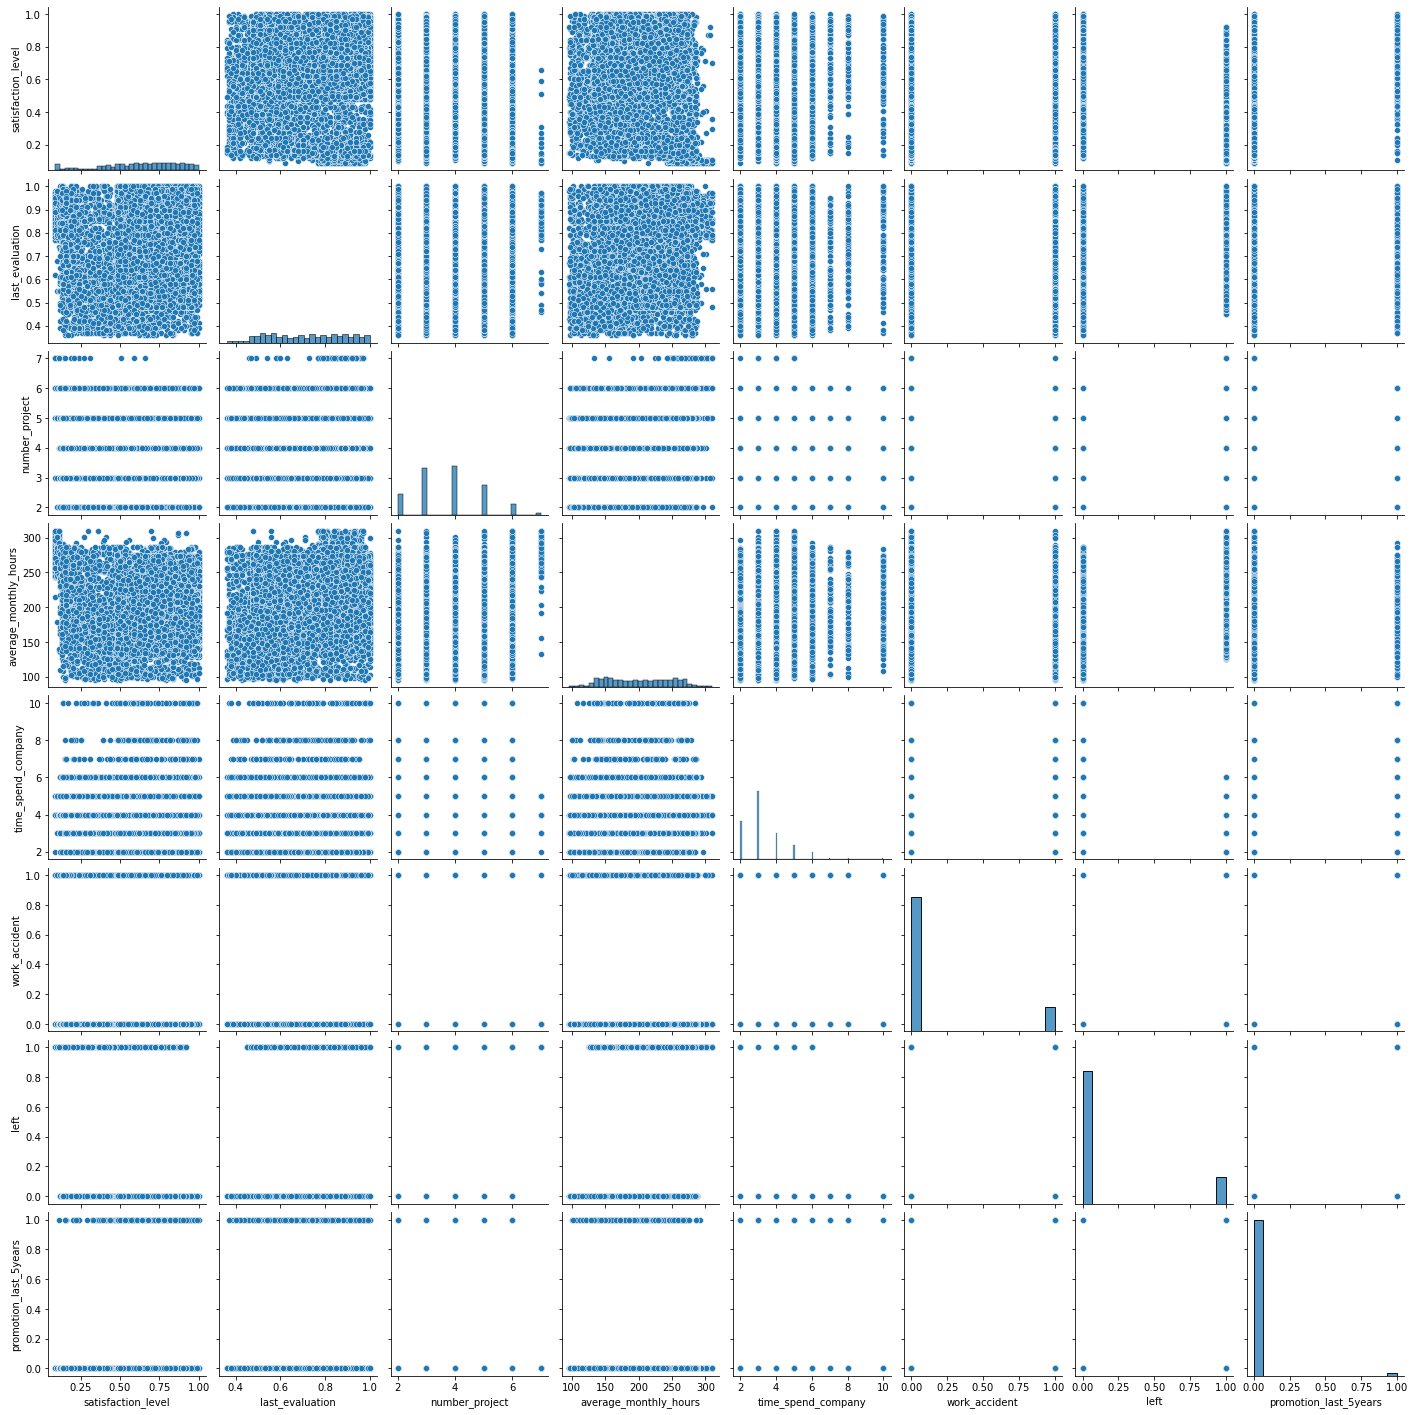

In [12]:
sns.pairplot(df_nodups)

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The analysis shows that there is no lineal regression between the variables, the only normal distributions are seen in the number_project and time_spend_company columns. The outliers is just a 6% of the data which would not be representative for a change in the variable analysis. The made transformations were to remove dups and to change the names of the columns. The purpose of the EDA is to understand the data. The resources I used was the pandas documentation. Based on the columns, there is no ethical considerations at this point.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df_nodups['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df_nodups['left'].value_counts() / len(df_nodups))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

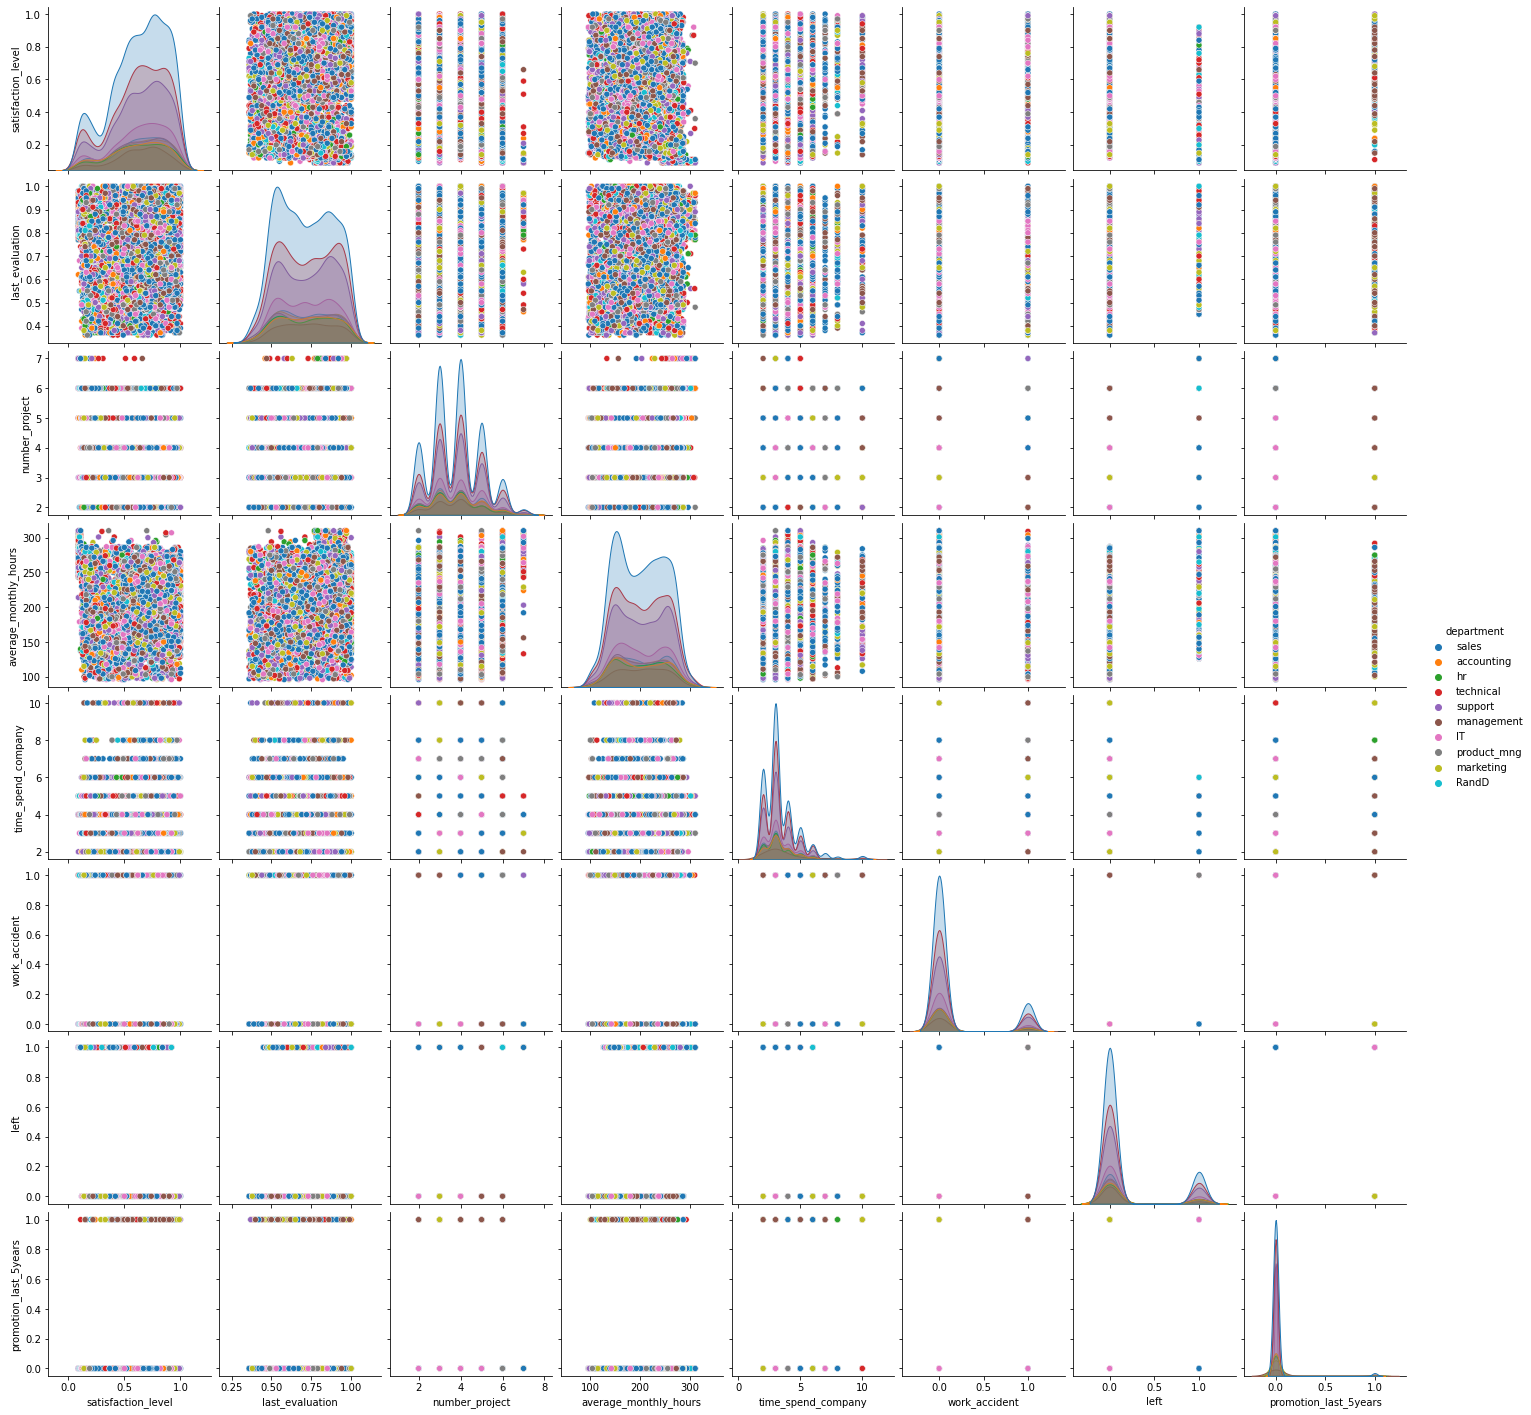

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df_nodups, hue='department')

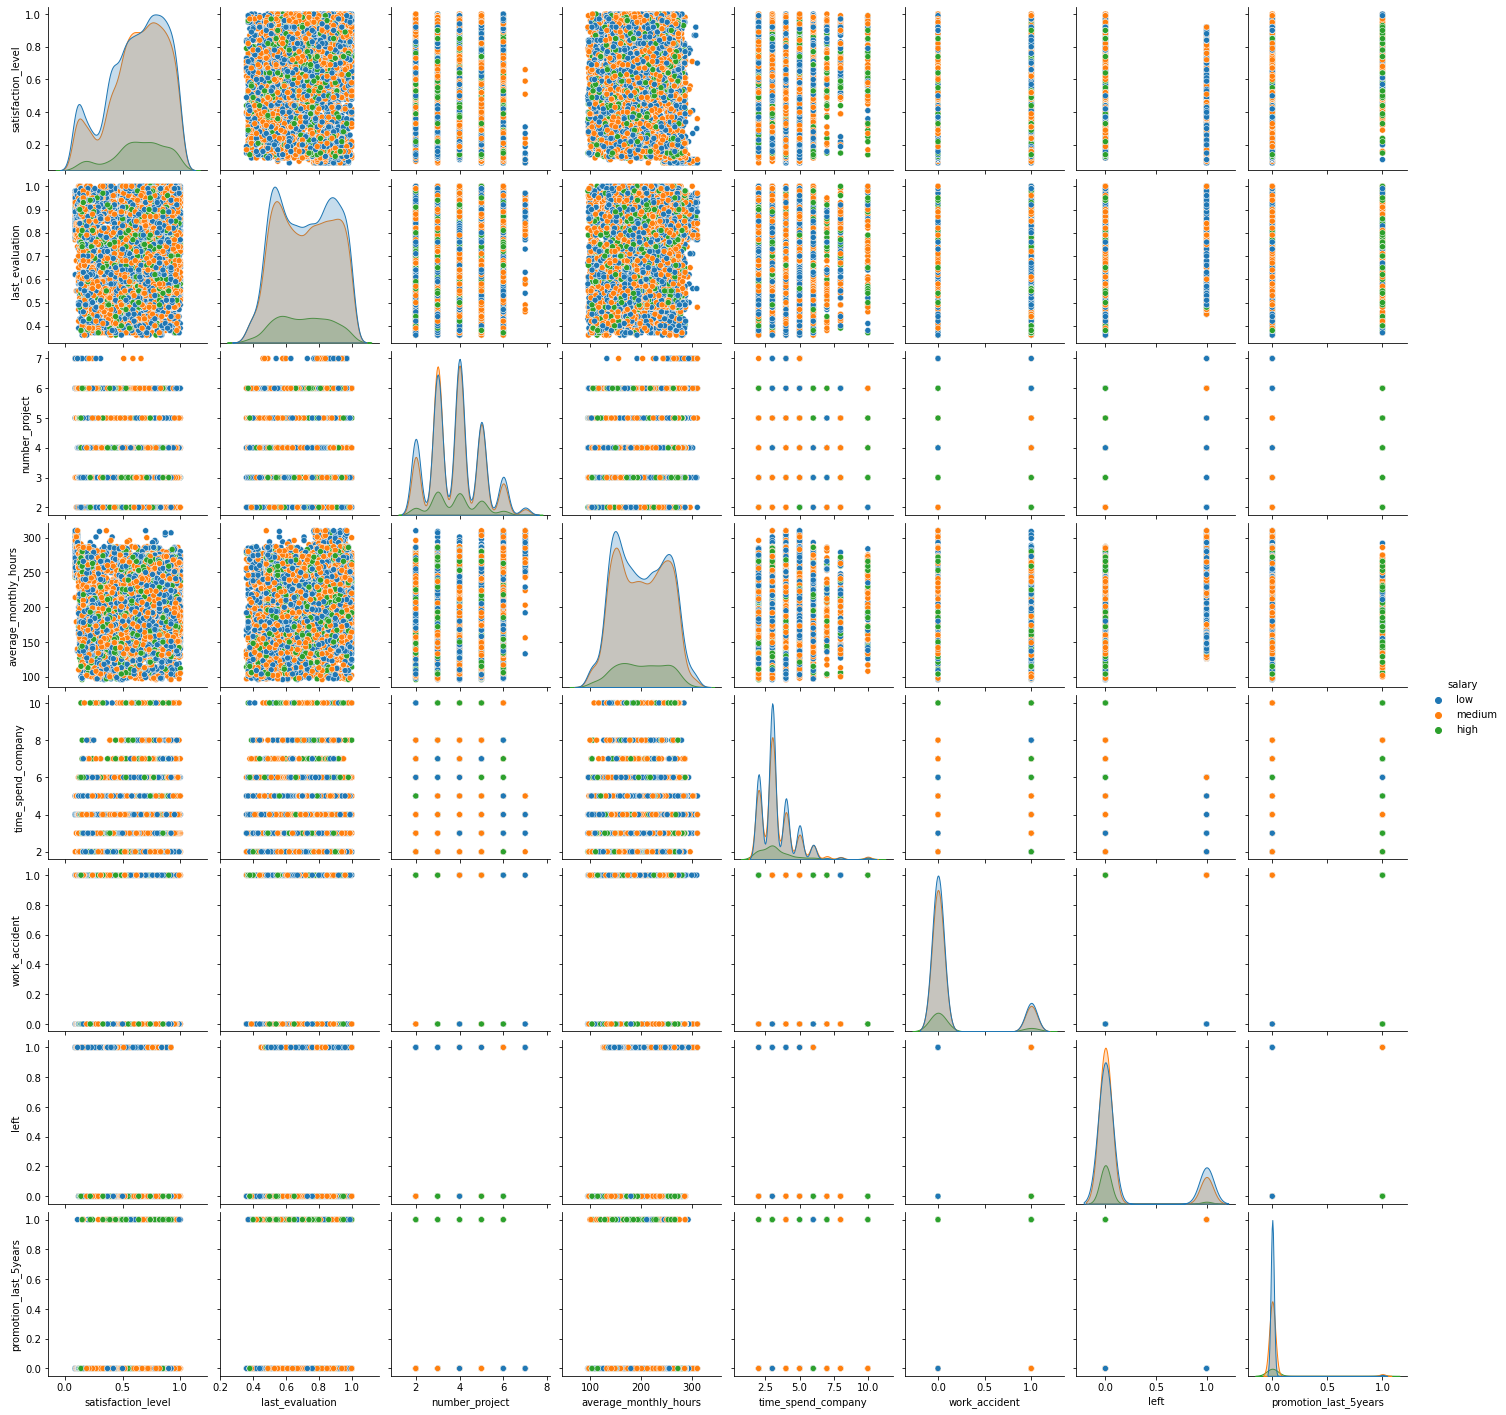

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df_nodups, hue='salary')

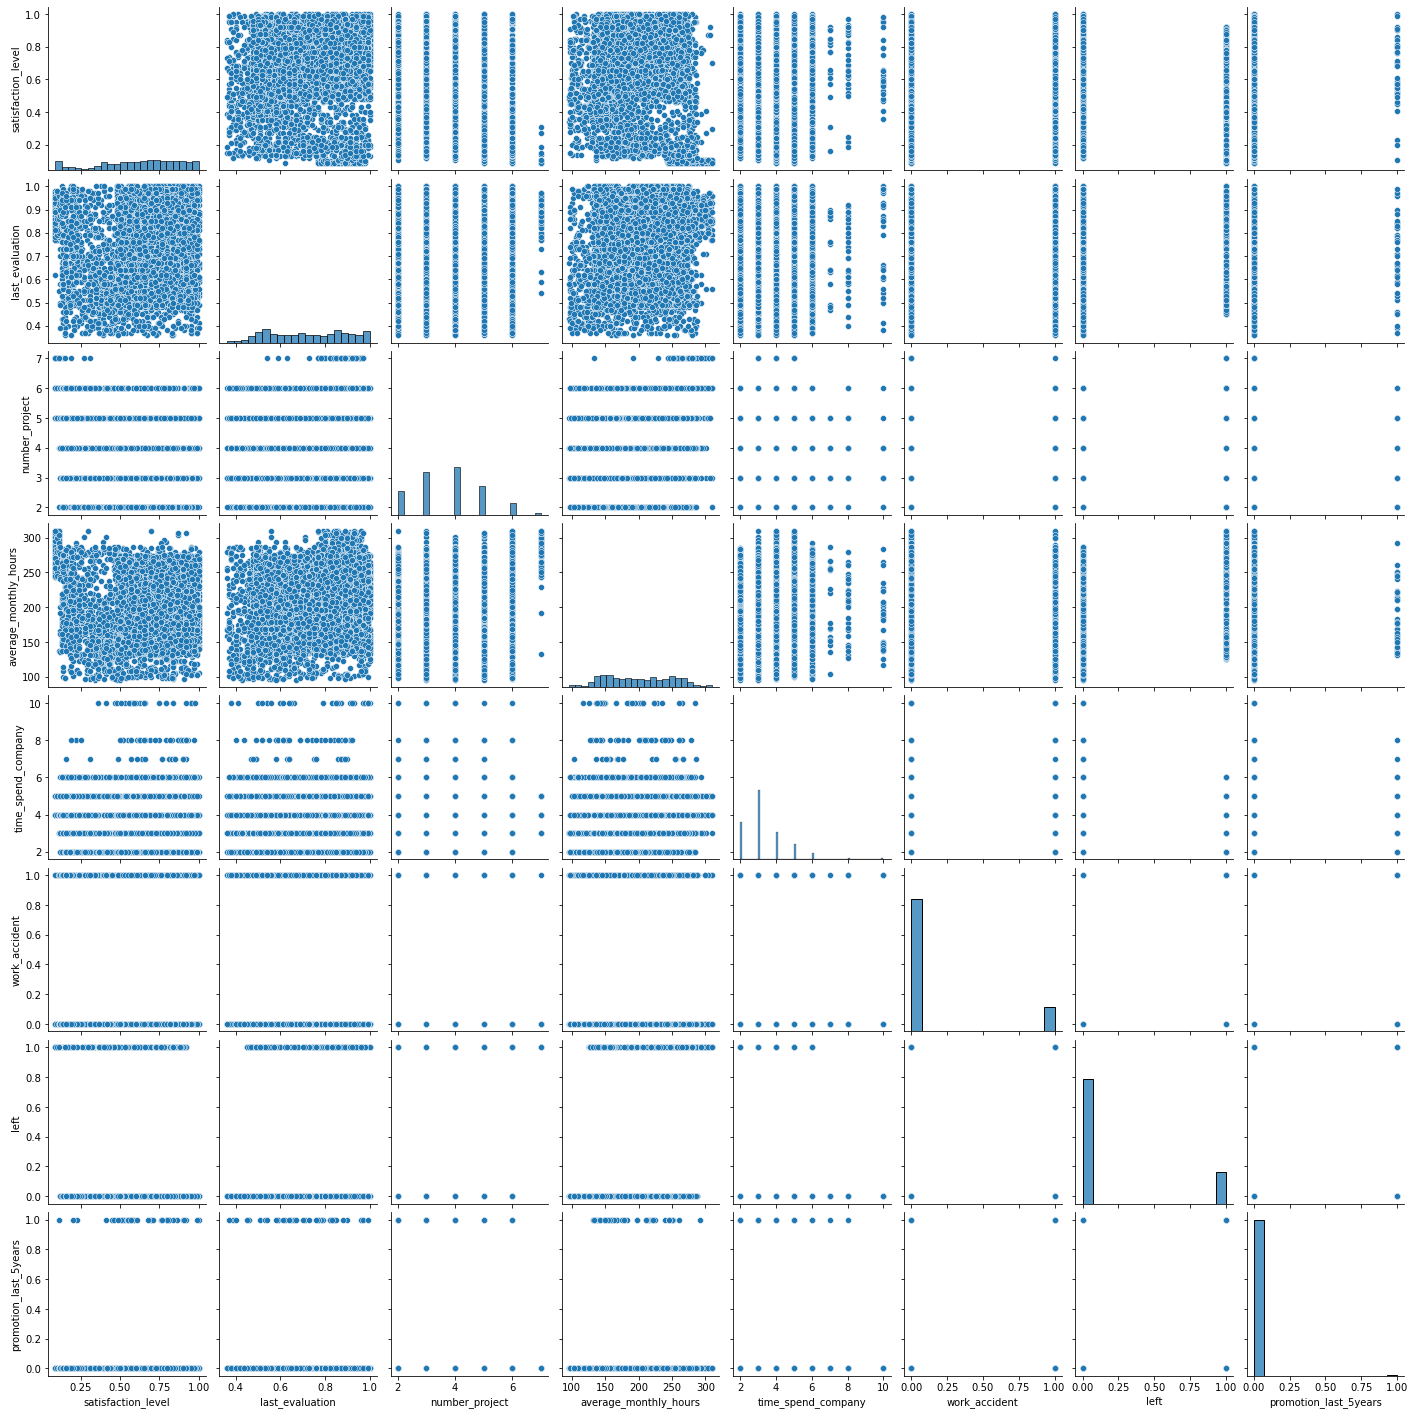

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df_nodups[df_nodups['salary']=='low'])

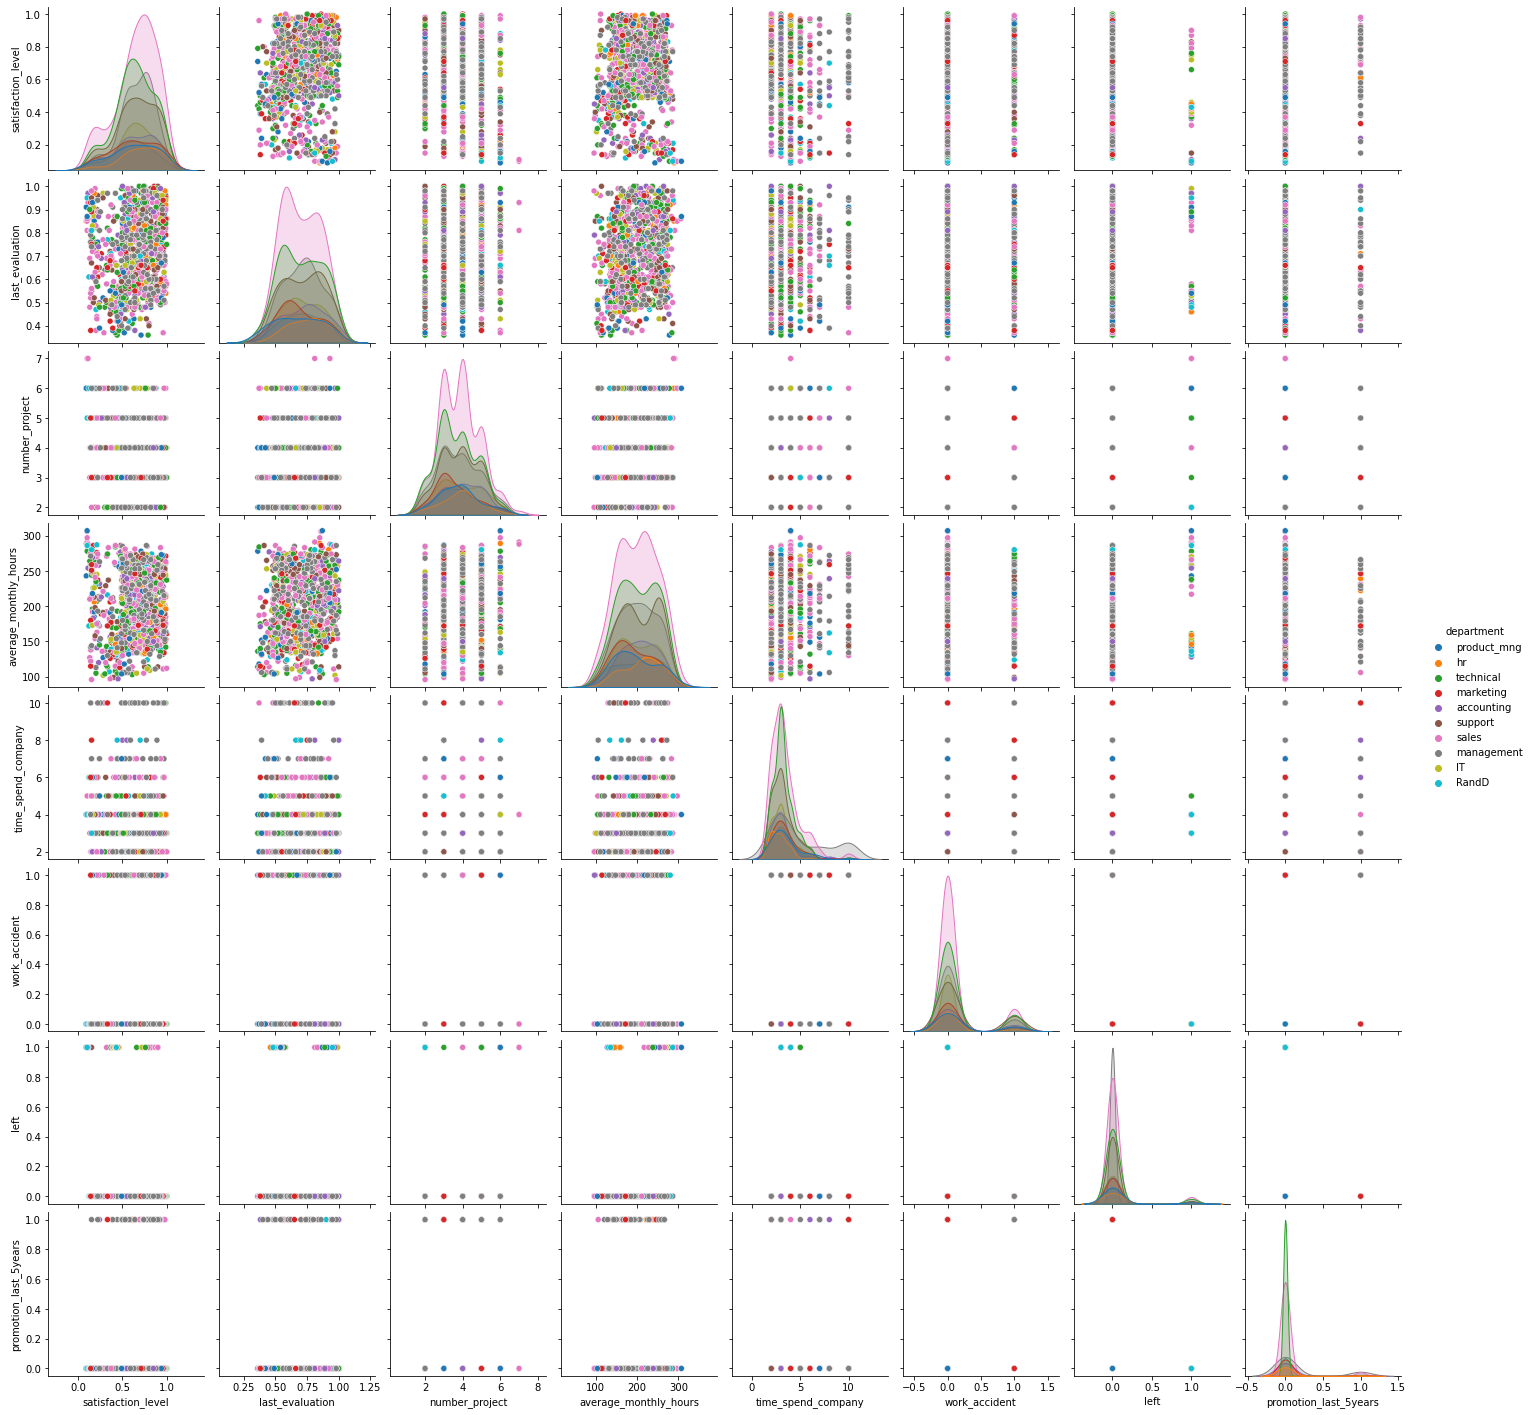

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df_nodups[df_nodups['salary']=='high'], hue='department')

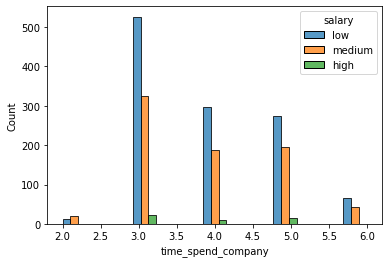

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_nodups[df_nodups['left']==1], x='time_spend_company', hue='salary', multiple='dodge')

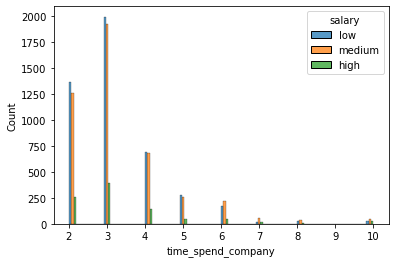

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_nodups[df_nodups['left']==0], x='time_spend_company', hue='salary', multiple='dodge')

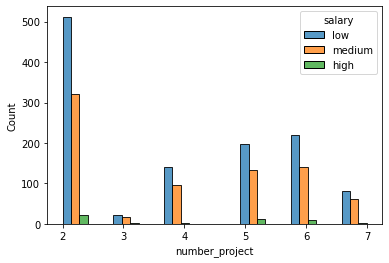

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_nodups[df_nodups['left']==1], x='number_project', hue='salary', multiple='dodge')

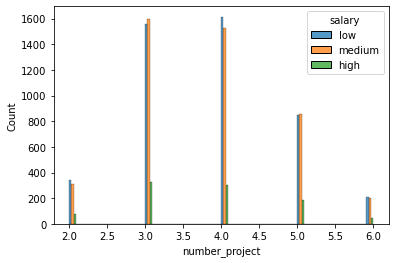

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_nodups[df_nodups['left']==0], x='number_project', hue='salary', multiple='dodge')

### Insights

The median of years that a person who leaves is 3 years.

The median of years that a person who is still in the comapny is also 3 years.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



I noticed that the data is imbalanced. I will not use the department and the average hours monthly and will keep all the other ones.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression

In [23]:
df_nodups.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [24]:
df_clean = df_nodups.drop(['department', 'average_monthly_hours'], axis=1)
df_clean.head()

satisfaction_level  last_evaluation  number_project  time_spend_company  \
0                0.38             0.53               2                   3   
1                0.80             0.86               5                   6   
2                0.11             0.88               7                   4   
3                0.72             0.87               5                   5   
4                0.37             0.52               2                   3   

   work_accident  left  promotion_last_5years  salary  
0              0     1                      0     low  
1              0     1                      0  medium  
2              0     1                      0  medium  
3              0     1                      0     low  
4              0     1                      0     low

In [25]:
df_clean_num = pd.get_dummies(df_clean, drop_first=True)
df_clean_num

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       time_spend_company  work_accident  left  promotion_last_5years  \
0                       3              0     1                      0   
1                       6              0     1                      0   
2                       4              0     1                      0   
3                       5              0     1                      0   
4                       3              0     1                      0   
...                   ...            ...   ...                    ...   
11995                  10              1     0                      1   
11996                  10              0     0                      1   
11997                  10              0     0                      1   
11998                  10              0     0                      1   
11999                   3              0     0                      0   

       salary_low  salary_medium  
0               1              0  
1               0              1  
2               0              1  
3               1              0  
4               1              0  
...           ...            ...  
11995           0              0  
11996           0              0  
11997           0              0  
11998           0              0  
11999           1              0  

[11991 rows x 9 columns]

In [26]:
from sklearn.utils import resample

# Assuming 'left' is the column indicating the category
df_majority = df_clean_num[df_clean_num.left == 0]
df_minority = df_clean_num[df_clean_num.left == 1]

# Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=1991,   # to match minority class
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_minority, df_majority_undersampled])

In [27]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df_balanced['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df_balanced['left'].value_counts() / len(df_balanced))

1    1991
0    1991
Name: left, dtype: int64
1    0.5
0    0.5
Name: left, dtype: float64


In [28]:
X = df_balanced.drop('left', axis=1)
X.head(5)

satisfaction_level  last_evaluation  number_project  time_spend_company  \
0                0.38             0.53               2                   3   
1                0.80             0.86               5                   6   
2                0.11             0.88               7                   4   
3                0.72             0.87               5                   5   
4                0.37             0.52               2                   3   

   work_accident  promotion_last_5years  salary_low  salary_medium  
0              0                      0           1              0  
1              0                      0           0              1  
2              0                      0           0              1  
3              0                      0           1              0  
4              0                      0           1              0

In [29]:
y = df_balanced['left']
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
clf = LogisticRegression().fit(X_train, y_train)

In [58]:
pd.DataFrame(clf.coef_, columns=X.columns)

satisfaction_level  last_evaluation  number_project  time_spend_company  \
0           -4.341152         1.174226       -0.378719            0.742964   

   work_accident  promotion_last_5years  salary_low  salary_medium  
0      -1.287181              -0.727059    1.947402       1.508595

In [33]:
clf.intercept_

array([-1.2216194])

In [34]:
y_pred = clf.predict(X_test)

In [36]:
import sklearn.metrics as metrics

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

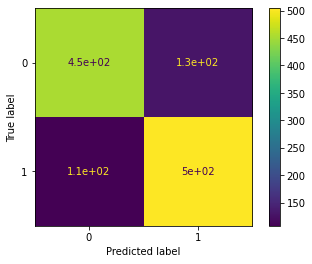

In [38]:
disp.plot()

In [40]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.800836820083682
precision score: 0.7949526813880127
recall score: 0.8235294117647058
f1 score: 0.8089887640449438


In [45]:
# Construct your GridSearch.

### YOUR CODE HERE ###
scoring = {'accuracy', 'precision', 'recall', 'f1'}

cv_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Different solvers for different penalties
    'max_iter': [100, 200, 300]
}

clf_cv = GridSearchCV(clf,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [46]:
%%time
# fit the GridSearch model to training data

### YOUR CODE HERE

clf_cv = clf_cv.fit(X_train, y_train)
clf_cv

CPU times: user 2min 37s, sys: 3min 54s, total: 6min 31s
Wall time: 3min 19s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring={'f1',

In [48]:
y_pred = clf_cv.predict(X_test)

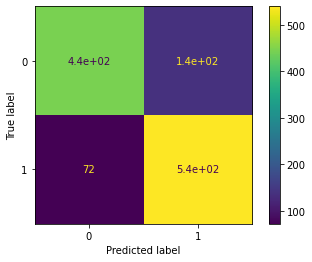

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_cv.classes_)
disp.plot()

In [49]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.8242677824267782
precision score: 0.7964601769911505
recall score: 0.8823529411764706
f1 score: 0.8372093023255814


AUC: 0.8202936692115382


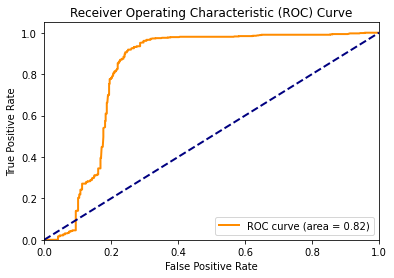

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = clf_cv.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [68]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

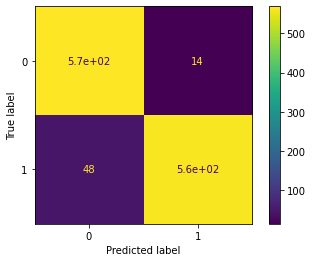

In [69]:
y_pred = rf_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred, labels = rf_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

In [70]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9481171548117154
precision score: 0.9757785467128027
recall score: 0.9215686274509803
f1 score: 0.9478991596638655


AUC: 0.9759190125449837


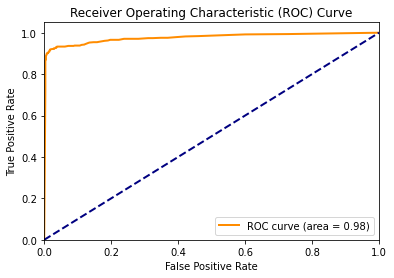

In [71]:
# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

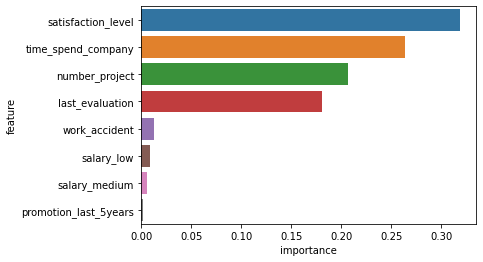

In [77]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



A RandomForestClassifier seems to be the best option, it gets a good estimator and doesn't take too much time to fit. The business recommendations I would give is to pay attention in 4 features: satisfaction level, spent years in the company, number of projects and the last evaluation. I would recommend to make their employees' satisfaction higher making them feel their work is crucial for the company, track the number of projects each employee has done and making them feel listened.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

I received an F1 of 0.94 and an area under the curve of 0.98.

### Conclusion, Recommendations, Next Steps

After several attempts the best model came, I tried to find a balance of time spent to fit and f1. The next steps would be to keep training the model with existing data.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.